Course Project
IBM Machine Learning Certificate - Course 2

WHO Life Expentancy

In [2]:
!conda install pandas -y

Solving environment: done

## Package Plan ##

  environment location: /Users/gaborsarosi/miniforge3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-1.3.4               |   py39h7f752ed_1        11.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        11.5 MB

The following packages will be UPDATED:

  pandas                               1.3.1-py39h7f752ed_0 --> 1.3.4-py39h7f752ed_1



pandas-1.3.4         | 11.5 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [709]:
import pandas as pd
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [710]:
print(os.listdir('../Course_Project/data'))
file_with_path = '../Course_Project/data/Life Expectancy Data.csv'

['Life Expectancy Data.csv']


In [711]:
who_data = pd.read_csv(file_with_path)
who_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [712]:
who_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [713]:
who_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [714]:
who_data.shape[0] #number of rows

2938

In [715]:
who_data.loc[who_data['Country']=='Hungary']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1154,Hungary,2015,Developed,75.8,134.0,0,NaN,0.000000,NaN,0,...,99.0,NaN,99.0,0.1,12365.62630,984328.0,1.6,1.6,0.834,15.6
1155,Hungary,2014,Developed,75.6,137.0,0,0.01,160.944934,NaN,0,...,99.0,7.40,99.0,0.1,14117.97668,9866468.0,1.7,1.6,0.834,15.8
1156,Hungary,2013,Developed,75.5,139.0,0,10.88,155.195208,NaN,1,...,99.0,7.53,99.0,0.1,13613.61470,989382.0,1.7,1.7,0.824,15.4
1157,Hungary,2012,Developed,75.0,146.0,0,11.27,164.279341,NaN,2,...,99.0,7.74,99.0,0.1,12834.32349,992362.0,1.7,1.7,0.823,15.4
1158,Hungary,2011,Developed,74.8,15.0,0,11.51,17.821219,NaN,5,...,99.0,7.84,99.0,0.1,1448.87958,9971727.0,1.7,1.7,0.821,15.4
1159,Hungary,2010,Developed,74.5,156.0,0,10.78,19.220240,NaN,0,...,99.0,7.85,99.0,0.1,1325.53379,123.0,1.8,1.8,0.817,15.3
1160,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.16543,12265.0,1.8,1.8,0.816,15.3
1161,Hungary,2008,Developed,74.1,165.0,1,11.64,181.763408,NaN,0,...,99.0,7.33,99.0,0.1,15669.25929,138188.0,1.9,1.9,0.812,15.3
1162,Hungary,2007,Developed,73.5,176.0,1,12.55,163.343328,NaN,0,...,99.0,7.51,99.0,0.1,13842.65490,15578.0,1.9,1.9,0.809,15.3
1163,Hungary,2006,Developed,73.4,177.0,1,13.16,1299.459306,NaN,1,...,99.0,8.10,99.0,0.1,11398.76584,17137.0,2.0,2.0,0.802,15.2


In [716]:
data_2015 = who_data.loc[who_data['Year'] == 2015]

In [717]:
data_2015.sort_values(by=['Life expectancy '])

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2297,Sierra Leone,2015,Developing,51.0,413.0,22,NaN,0.0,86.0,607,...,86.0,NaN,86.0,0.5,587.538233,723725.0,7.4,7.3,0.431,9.5
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
512,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.0,47.0,150,...,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
528,Chad,2015,Developing,53.1,356.0,46,NaN,0.0,46.0,418,...,52.0,NaN,46.0,2.8,777.248751,149413.0,8.5,8.4,0.394,7.3
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,Japan,2015,Developed,83.7,55.0,2,NaN,0.0,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
673,Cyprus,2015,Developed,85.0,52.0,0,NaN,0.0,97.0,0,...,97.0,NaN,97.0,0.1,2375.112700,116985.0,1.0,1.0,0.854,14.3
544,Chile,2015,Developing,85.0,82.0,2,NaN,0.0,97.0,9,...,96.0,NaN,96.0,0.1,13653.226400,17762681.0,0.8,0.8,0.845,16.3
737,Denmark,2015,Developed,86.0,71.0,0,NaN,0.0,NaN,9,...,93.0,NaN,93.0,0.1,5314.644160,5683483.0,1.1,0.9,0.923,19.2


In [718]:
data_2015.sort_values(by=['Life expectancy ']).tail(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2087,Republic of Korea,2015,Developing,82.3,64.0,1,NaN,0.0,98.0,7,...,98.0,NaN,98.0,0.1,NaN,NaN,1.5,1.0,NaN,NaN
2505,Sweden,2015,Developed,82.4,53.0,0,NaN,0.0,67.0,22,...,98.0,NaN,98.0,0.1,5585.25847,9799186.0,1.5,1.4,0.909,15.9
930,France,2015,Developing,82.4,78.0,2,NaN,0.0,86.0,157,...,98.0,NaN,98.0,0.1,36526.77110,6662468.0,0.7,0.6,0.894,16.3
1266,Israel,2015,Developing,82.5,58.0,0,NaN,0.0,96.0,80,...,95.0,NaN,95.0,0.1,35729.37253,8381.0,1.2,1.1,0.898,16.0
1170,Iceland,2015,Developed,82.7,49.0,0,NaN,0.0,NaN,0,...,92.0,NaN,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
1282,Italy,2015,Developed,82.7,56.0,1,NaN,0.0,93.0,159,...,93.0,NaN,93.0,0.1,349.14755,673582.0,0.6,0.6,0.881,16.3
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
2425,Spain,2015,Developed,82.8,56.0,1,NaN,0.0,97.0,115,...,97.0,NaN,97.0,0.1,25683.84565,46447697.0,0.6,0.5,0.882,17.7
2313,Singapore,2015,Developed,83.1,55.0,0,1.79,0.0,96.0,0,...,96.0,NaN,96.0,0.1,53629.73746,NaN,2.2,2.2,0.924,15.4
2521,Switzerland,2015,Developed,83.4,49.0,0,NaN,0.0,NaN,35,...,97.0,NaN,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0


In [719]:
data_2015.sort_values(by=['Life expectancy ']).head(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2297,Sierra Leone,2015,Developing,51.0,413.0,22,NaN,0.0,86.0,607,...,86.0,NaN,86.0,0.5,587.538233,723725.0,7.4,7.3,0.431,9.5
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
512,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.0,47.0,150,...,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
528,Chad,2015,Developing,53.1,356.0,46,NaN,0.0,46.0,418,...,52.0,NaN,46.0,2.8,777.248751,149413.0,8.5,8.4,0.394,7.3
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
1474,Lesotho,2015,Developing,53.7,484.0,4,NaN,0.0,93.0,0,...,9.0,NaN,93.0,9.3,173.828930,2174645.0,5.5,5.3,0.495,10.7
1893,Nigeria,2015,Developing,54.5,344.0,483,NaN,0.0,49.0,12423,...,49.0,NaN,49.0,3.7,2655.157977,181181744.0,9.8,9.7,0.525,10.0
2377,Somalia,2015,Developing,55.0,312.0,50,NaN,0.0,42.0,7497,...,47.0,NaN,42.0,0.7,426.985370,NaN,6.6,6.4,NaN,NaN
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.0,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
480,Cameroon,2015,Developing,57.3,357.0,45,NaN,0.0,84.0,1809,...,83.0,NaN,84.0,3.5,1244.429421,22834522.0,5.6,5.5,0.514,10.4


In [720]:
who_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [721]:
who_data['Country'].unique().size

193

In [722]:
who_data['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [723]:
countries_missing_years = []
for country in who_data['Country'].unique():
    years_count = who_data[who_data['Country'] == country].shape[0]
    year = who_data[who_data['Country'] == country]['Year'].values[0]
    if years_count < 16:
        countries_missing_years.append(country)
        print(country, years_count)
        print(year)
countries_missing_years

Cook Islands 1
2013
Dominica 1
2013
Marshall Islands 1
2013
Monaco 1
2013
Nauru 1
2013
Niue 1
2013
Palau 1
2013
Saint Kitts and Nevis 1
2013
San Marino 1
2013
Tuvalu 1
2013


['Cook Islands',
 'Dominica',
 'Marshall Islands',
 'Monaco',
 'Nauru',
 'Niue',
 'Palau',
 'Saint Kitts and Nevis',
 'San Marino',
 'Tuvalu']

In [724]:
who_data[who_data['Country'] == 'Tuvalu']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.13589,1819.0,0.2,0.1,NaN,0.0


In [725]:
who_data[who_data['Year'] == 2013]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
50,Angola,2013,Developing,51.1,355.0,69,8.10,35.958573,77.0,8523,...,67.0,4.26,77.0,2.3,484.616884,2599834.0,8.6,8.5,0.523,11.4
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.71,0.000000,82.0,0,...,82.0,4.94,82.0,0.1,NaN,NaN,1.6,1.5,0.770,14.2
2876,Viet Nam,2013,Developing,75.7,129.0,28,4.00,0.000000,59.0,1123,...,93.0,7.17,59.0,0.1,NaN,NaN,14.3,14.9,0.668,12.3
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.000000,73.0,400,...,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2908,Zambia,2013,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,...,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5


<b>Drop columns with too many missing values</b>

In [726]:
who_data.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [727]:
who_data1 = who_data.copy()

In [728]:
cols_to_drop = ['Population', 'Hepatitis B', 'GDP', 'Total expenditure']

In [729]:
who_data1.drop(cols_to_drop, axis=1, inplace = True)

In [730]:
who_data1.drop('Status', axis=1, inplace = True)

In [731]:
who_data1

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


In [732]:
import matplotlib.pyplot as plt # plotting

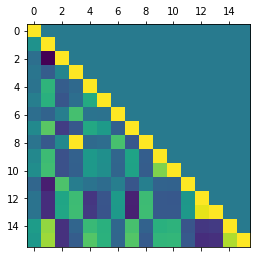

In [733]:
plt.matshow(np.tril(who_data1.corr()))

In [734]:
import seaborn as sns

In [735]:
who_data1.drop(['Country'], axis=1, inplace=True)

In [736]:
who_data1_indices = who_data1.columns.array
print(who_data1_indices)

<PandasArray>
[                           'Year',                'Life expectancy ',
                 'Adult Mortality',                   'infant deaths',
                         'Alcohol',          'percentage expenditure',
                        'Measles ',                           ' BMI ',
              'under-five deaths ',                           'Polio',
                     'Diphtheria ',                       ' HIV/AIDS',
           ' thinness  1-19 years',             ' thinness 5-9 years',
 'Income composition of resources',                       'Schooling']
Length: 16, dtype: object


(16, 16)
Features-pairs with over 0.8 Multi-Collinearity
under-five deaths  and infant deaths --> Correlation Score 0.996628882039801
 thinness 5-9 years and  thinness  1-19 years --> Correlation Score 0.93910199219146
Schooling and Life expectancy  --> Correlation Score 0.7519754627367001
Schooling and Income composition of resources --> Correlation Score 0.8000924203919638


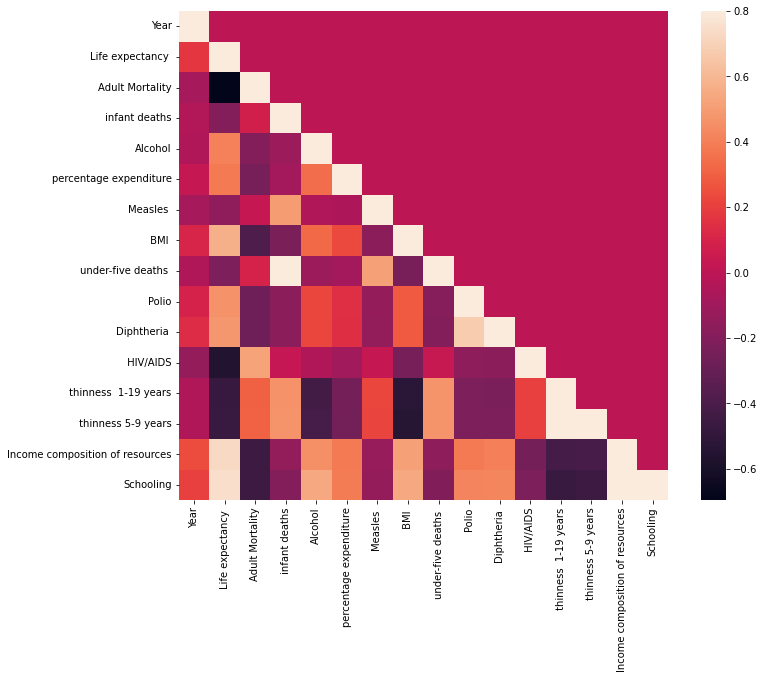

In [737]:
corr_mat = np.tril(who_data1.corr())
print(corr_mat.shape)
corrmat = pd.DataFrame(data=corr_mat, index=who_data1_indices, columns=who_data1_indices)
#corrmat.reindex(who_data1_indices)
#corrmat = who_data1.corr()
#print(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

print('Features-pairs with over 0.8 Multi-Collinearity')

corr_pairs = {}
for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.75 and corrmat.iloc[i,j] != 1.0:
      print('{} and {} --> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],corrmat.iloc[i,j]))

In [738]:
who_data1.drop(['infant deaths', ' thinness 5-9 years', 'Income composition of resources'], axis=1, inplace=True)

In [739]:
print(who_data1.columns)
print(who_data1.shape)

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ',
       'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       'Schooling'],
      dtype='object')
(2938, 13)


In [740]:
who_data1.dropna(axis=0, inplace=True)

In [741]:
who_data1.shape

(2562, 13)

In [742]:
who_data_cleaned = who_data1.copy()

In [743]:
who_data_cleaned.drop(['Year'], axis=1, inplace=True)

In [744]:
who_data_cleaned.shape

(2562, 12)

At this point we have 3 dataframes: <br>
<b>who_data</b> - original data <br>
<b>who_data1</b> - dropped columns with too many (>200) missing values, 
and 'Status', 'Country'
and highly correlated ones : 'infant deaths', ' thinness 5-9 years', 'Income composition of resources' 
and rows with missing values were dropped <br>
<b>who_data_cleaned</b> - who_data1 without the 'Year' column because it won't help with linear regression

<h2>Transforming Target</h2>

array([[<AxesSubplot:title={'center':'Life expectancy '}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Measles '}>,
        <AxesSubplot:title={'center':' BMI '}>],
       [<AxesSubplot:title={'center':'under-five deaths '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria '}>],
       [<AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':' thinness  1-19 years'}>,
        <AxesSubplot:title={'center':'Schooling'}>]], dtype=object)

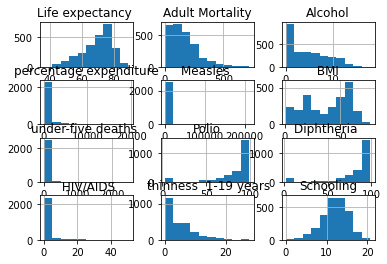

In [745]:
who_data_cleaned.hist()

<AxesSubplot:>

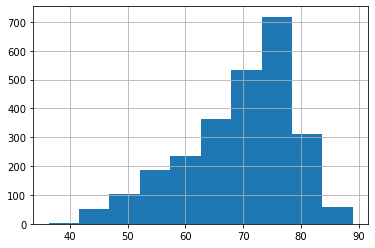

In [746]:
who_data_cleaned['Life expectancy '].hist()

Looks left-skewed

In [747]:
from scipy.stats.mstats import normaltest

In [748]:
normaltest(who_data_cleaned['Life expectancy '].values)

NormaltestResult(statistic=168.819878682525, pvalue=2.1939621267620458e-37)

p-value is way too small, not normally distributed

In [749]:
log_life_expentancy = np.log(who_data_cleaned['Life expectancy '])

<AxesSubplot:>

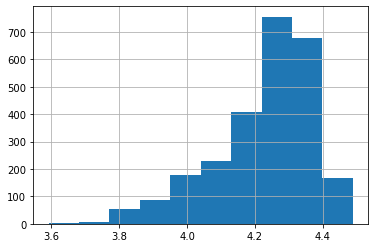

In [750]:
log_life_expentancy.hist()

In [751]:
sqrt_life_expectancy = np.sqrt(who_data_cleaned['Life expectancy '])

(array([  2.,  17.,  85., 126., 246., 265., 381., 924., 432.,  84.]),
 array([6.02494813, 6.36585143, 6.70675473, 7.04765803, 7.38856133,
        7.72946463, 8.07036793, 8.41127123, 8.75217453, 9.09307783,
        9.43398113]),
 <BarContainer object of 10 artists>)

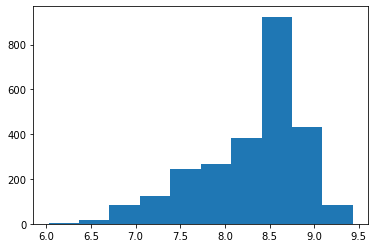

In [752]:
plt.hist(sqrt_life_expectancy)

In [753]:
from scipy.stats import boxcox

In [754]:
who_data_cleaned['Life expectancy '].values

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [755]:
bc_result = boxcox(who_data_cleaned['Life expectancy '])
bc_life_expectancy = bc_result[0]
lam = bc_result[1]

In [756]:
lam

2.9475514537641865

(array([ 78., 218., 268., 343., 357., 730., 312., 192.,  37.,  27.]),
 array([ 13441.03411597,  30997.07732964,  48553.12054331,  66109.16375698,
         83665.20697066, 101221.25018433, 118777.293398  , 136333.33661167,
        153889.37982535, 171445.42303902, 189001.46625269]),
 <BarContainer object of 10 artists>)

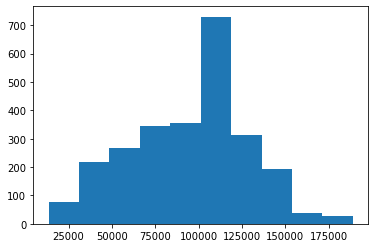

In [757]:
plt.hist(bc_life_expectancy)

In [758]:
bc_life_expectancy

array([74850.03993263, 58829.22331086, 58829.22331086, ...,
       24989.6181277 , 25820.67323065, 27014.52992526])

In [759]:
normaltest(bc_life_expectancy)

NormaltestResult(statistic=38.06569405666686, pvalue=5.421750905684999e-09)

P-value still very small, not normally distributed

<h2>Linear Regression models</h2>

<h3>Simple Linear Regression for Baseline</h3>

In [762]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [763]:
lr = LinearRegression()

In [764]:
y_col = 'Life expectancy '
X = who_data_cleaned.drop(y_col, axis=1)
y = who_data_cleaned[y_col] 

In [801]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [802]:
X.shape

(2562, 11)

In [803]:
y.shape

(2562,)

In [920]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [921]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1793, 11)
(769, 11)
(1793,)
(769,)


In [922]:
lr.fit(X_train, y_train)

LinearRegression()

In [923]:
lr_pred = lr.predict(X_test)
r2_score(lr_pred, y_test)

0.7586518656967627

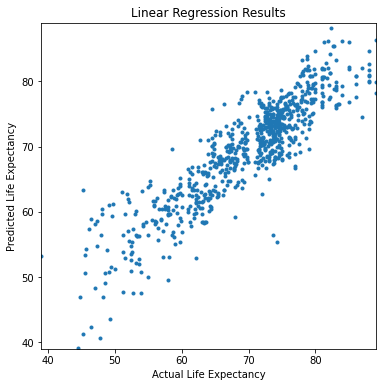

In [924]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, lr.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (y_test.min(), y_test.max())

ax.set(xlabel='Actual Life Expectancy', 
       ylabel='Predicted Life Expectancy', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

<h3>Adding polynomial features</h3>

In [925]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [926]:
print(X_pf.shape)
print(y.shape)

(2562, 77)
(2562,)


In [927]:
X_pf_train, X_pf_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.2, 
                                                    random_state=421)

In [928]:
lr_pf = LinearRegression() 

In [929]:
lr_pf.fit(X_pf_train, y_train)

LinearRegression()

In [930]:
lr_pf_pred = lr_pf.predict(X_pf_test)
r2_score(lr_pf_pred, y_test)

0.8607548230989525

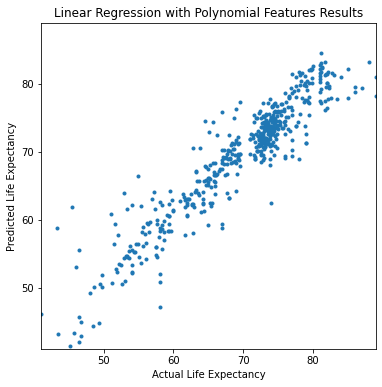

In [931]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, lr_pf.predict(X_pf_test), 
         marker='o', ls='', ms=3.0)

lim = (y_test.min(), y_test.max())

ax.set(xlabel='Actual Life Expectancy', 
       ylabel='Predicted Life Expectancy', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression with Polynomial Features Results');

<h2>Adding regularization</h2>

In [932]:
from sklearn.linear_model import Lasso

In [933]:
las = Lasso()
las.fit(X_pf, y)
las.coef_ 

array([-0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  1.09331646,  2.89044926, -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  3.79770385,  0.        , -0.        , -0.  

In [934]:
las01 = Lasso(alpha = 0.1)
las01.fit(X_pf, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 61.132521563703136
number of coefficients not equal to 0: 8


In [935]:
las05 = Lasso(alpha = 0.05)
las05.fit(X_pf, y)
print('sum of coefficients:',abs(las1.coef_).sum() )
print('number of coefficients not equal to 0:',(las1.coef_!=0).sum())

sum of coefficients: 0.45974570562365424
number of coefficients not equal to 0: 68


In [941]:
alphas = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    las.fit(X_pf_train, y_train)
    print('Lasso alpha {} R2: {}'.format(str(alpha), str(r2_score(y_test,las.predict(X_pf_test)))) )

Lasso alpha 1 R2: 0.27811290302835645
Lasso alpha 0.5 R2: 0.6065599388964806
Lasso alpha 0.1 R2: 0.79361012364358
Lasso alpha 0.05 R2: 0.8103530807041384
Lasso alpha 0.01 R2: 0.8553896576165068
Lasso alpha 0.005 R2: 0.8762366209120942
Lasso alpha 0.001 R2: 0.885813139015448
Lasso alpha 0.0005 R2: 0.884075970841822
Lasso alpha 0.0001 R2: 0.8782931984035807
Lasso alpha 5e-05 R2: 0.8758248927644665
Lasso alpha 1e-05 R2: 0.873779463455158


In [943]:
las001 = Lasso(alpha=0.001, max_iter=100000)
las001.fit(X_pf_train, y_train)
r2_score(y_test,las001.predict(X_pf_test))

0.885813139015448

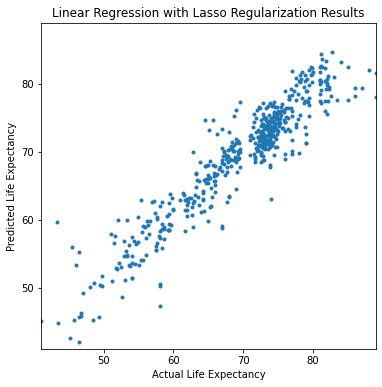

In [944]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, las001.predict(X_pf_test), 
         marker='o', ls='', ms=3.0)

lim = (y_test.min(), y_test.max())

ax.set(xlabel='Actual Life Expectancy', 
       ylabel='Predicted Life Expectancy', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression with Lasso Regularization Results');

In [960]:
from sklearn.linear_model import Ridge

In [961]:
alphas = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
for alpha in alphas:
    r = Ridge(alpha=alpha, max_iter=10000)
    r.fit(X_pf_train, y_train)
    print('Ridge alpha {} R2: {}'.format(str(alpha), str(r2_score(y_test,r.predict(X_pf_test))) ))

Ridge alpha 1 R2: 0.8693707282112473
Ridge alpha 0.5 R2: 0.8765300387371715
Ridge alpha 0.1 R2: 0.8817344590532453
Ridge alpha 0.05 R2: 0.8812040706441591
Ridge alpha 0.01 R2: 0.8784109856824199
Ridge alpha 0.005 R2: 0.8771531936786897
Ridge alpha 0.001 R2: 0.8747211948738214
Ridge alpha 0.0005 R2: 0.8740827177429323
Ridge alpha 0.0001 R2: 0.8734503838295158
Ridge alpha 5e-05 R2: 0.8733819073451943
Ridge alpha 1e-05 R2: 0.873351658623448


In [962]:
ridge01 = Ridge(alpha=0.1, max_iter=10000)
ridge01.fit(X_pf_train, y_train)
y_pred_ridge01 = ridge01.predict(X_pf_test)

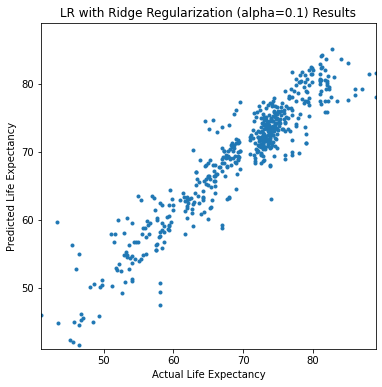

In [966]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred_ridge01, 
         marker='o', ls='', ms=3.0)

lim = (y_test.min(), y_test.max())

ax.set(xlabel='Actual Life Expectancy', 
       ylabel='Predicted Life Expectancy', 
       xlim=lim,
       ylim=lim,
       title='LR with Ridge Regularization (alpha=0.1) Results');

In [949]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [950]:
from sklearn.linear_model import RidgeCV

In [951]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_pf_train, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_pf_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.05 3.1929692974708677


In [952]:
r2_score(y_test, ridgeCV.predict(X_pf_test))

0.8812040706441591